In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mg
import pandas as pd
import numpy as np

In [3]:
img = mg.imread('../Datasets/palm_trees.jpg')

In [6]:
img[:2]

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]]], dtype=uint8)

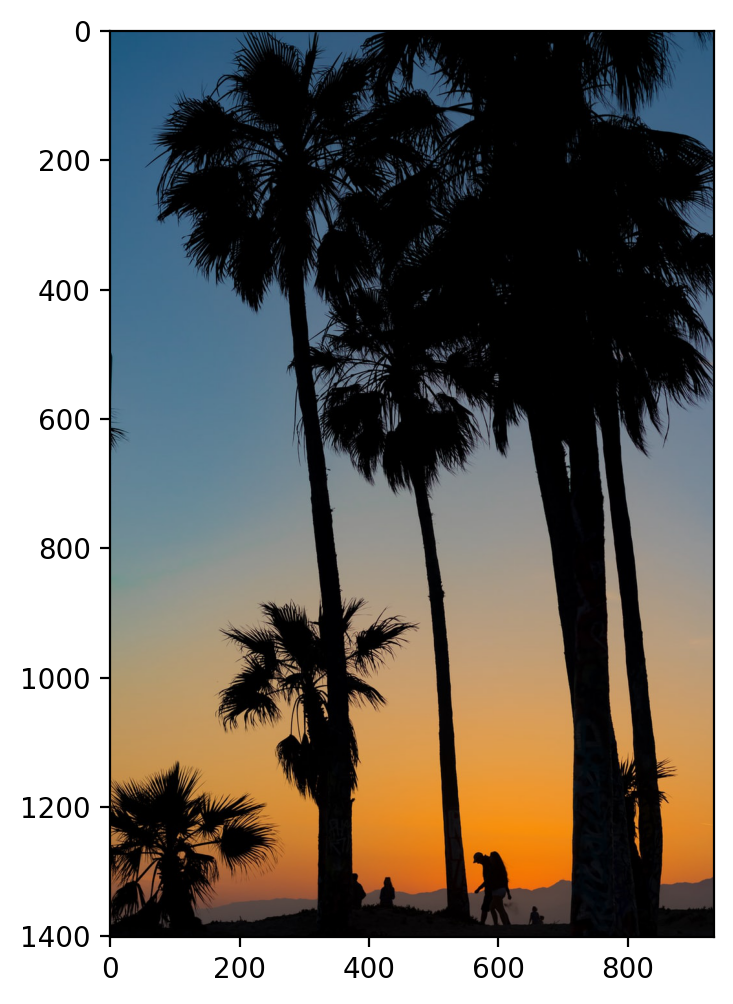

In [11]:
#plot image
plt.figure(figsize=(8,6),dpi=200)
plt.imshow(img)
plt.show()

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [12]:
img.shape

(1401, 934, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [13]:
(h,w,c) = img.shape

In [14]:
image_2darray = img.reshape(h*w,c)

In [15]:
image_2darray

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [16]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters=6)

In [27]:
labels = model.fit_predict(image_2darray)

In [28]:
labels

array([0, 0, 0, ..., 3, 3, 3])

In [21]:
rbg_code = model.cluster_centers_.round(0).astype(int)

In [22]:
rbg_code


array([[  3,   3,   4],
       [137, 144, 144],
       [219, 135,  47],
       [ 67,  62,  62],
       [ 71, 109, 138],
       [191, 155, 110]])

In [24]:
quantized_image = np.reshape(rbg_code[labels],(w,h,c))

In [25]:
quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

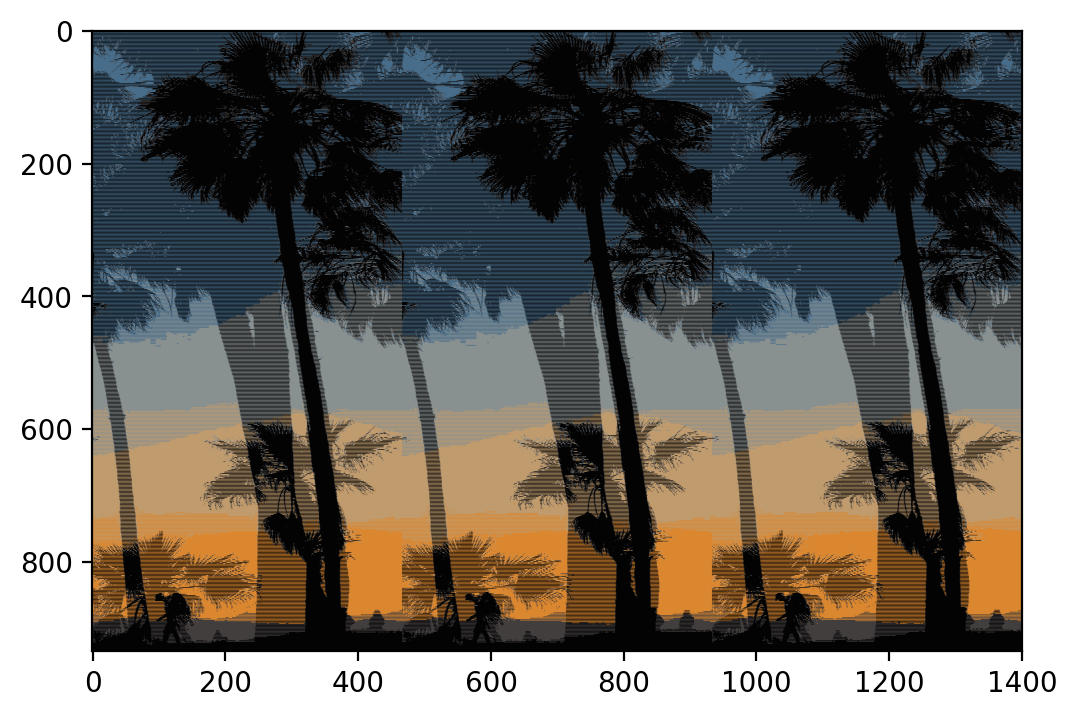

In [26]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)